In [6]:
import pandas as pd

# For loading data as Pandas Dataframe
import numpy as np

# For performing Matrix Calculations
import seaborn as sns

# For visualizing statistical results
import scipy.stats as s

# For computing Statistical Functions
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# For plotting Distributions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# For evaluating the performance of the model

In [8]:
data = pd.read_excel("Fitur_quality.xlsx")
data

,BMI,HR,SDNN,RMSSD,SDSD,pNN50,LF,HF,LF/HF,SD1,SD2,SD_ratio,Label
0,25.9,43.371765,136.627230,167.884118,147.336027,44.632768,0.041016,0.150391,1.573721,118.711852,152.390799,1.283703,0
1,25.9,43.209895,158.800617,186.541738,165.744091,44.696970,0.073242,0.178711,1.484478,131.904894,181.741153,1.377820,0
2,25.9,42.938592,136.909416,146.394741,125.156244,46.197719,0.040039,0.208984,1.972823,103.516465,163.532669,1.579774,0
3,24.5,40.071037,166.785007,200.025694,175.655510,49.234694,0.068359,0.156250,1.724128,141.439523,188.734579,1.334384,1
4,25.9,50.502192,305.105079,301.871241,270.587205,50.189394,0.060547,0.157227,1.449574,213.455200,374.974233,1.756688,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,NaN,44.931388,589.049127,913.196598,532.391593,92.146597,0.088867,0.236328,0.502044,645.726979,522.580222,0.809290,0
105,NaN,59.490622,135.610427,64.607791,38.978432,47.916667,0.040039,0.272461,0.203282,45.676245,185.530246,4.061854,0
106,NaN,61.123084,127.522659,104.882885,75.627238,53.355705,0.044922,0.254883,2.447448,74.162843,164.121556,2.212989,0
107,NaN,64.437932,55.039434,52.842236,30.052714,38.993711,0.054688,0.219727,0.359295,37.364273,67.390739,1.803614,0


0    90
1    19
Name: Label, dtype: int64


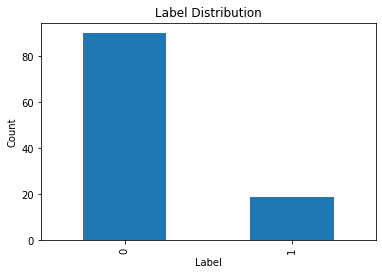

In [9]:
label_distribution = data["Label"].value_counts()
print(label_distribution)
label_distribution.plot(kind="bar")
plt.xlabel("Label")
plt.ylabel("Count")
plt.title("Label Distribution")
plt.show()

In [10]:
data_columns = data.columns
data_columns

Index(['BMI', 'HR', 'SDNN', 'RMSSD', 'SDSD', 'pNN50', 'LF', 'HF', 'LF/HF',
       'SD1', 'SD2', 'SD_ratio', 'Label'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BMI       36 non-null     float64
 1   HR        109 non-null    float64
 2   SDNN      109 non-null    float64
 3   RMSSD     109 non-null    float64
 4   SDSD      109 non-null    float64
 5   pNN50     109 non-null    float64
 6   LF        109 non-null    float64
 7   HF        109 non-null    float64
 8   LF/HF     109 non-null    float64
 9   SD1       109 non-null    float64
 10  SD2       109 non-null    float64
 11  SD_ratio  109 non-null    float64
 12  Label     109 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 11.2 KB


In [12]:
data_copy = data.replace(to_replace=["0", "1"], value=[0, 1], inplace=False)
data_copy

,BMI,HR,SDNN,RMSSD,SDSD,pNN50,LF,HF,LF/HF,SD1,SD2,SD_ratio,Label
0,25.9,43.371765,136.627230,167.884118,147.336027,44.632768,0.041016,0.150391,1.573721,118.711852,152.390799,1.283703,0
1,25.9,43.209895,158.800617,186.541738,165.744091,44.696970,0.073242,0.178711,1.484478,131.904894,181.741153,1.377820,0
2,25.9,42.938592,136.909416,146.394741,125.156244,46.197719,0.040039,0.208984,1.972823,103.516465,163.532669,1.579774,0
3,24.5,40.071037,166.785007,200.025694,175.655510,49.234694,0.068359,0.156250,1.724128,141.439523,188.734579,1.334384,1
4,25.9,50.502192,305.105079,301.871241,270.587205,50.189394,0.060547,0.157227,1.449574,213.455200,374.974233,1.756688,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,NaN,44.931388,589.049127,913.196598,532.391593,92.146597,0.088867,0.236328,0.502044,645.726979,522.580222,0.809290,0
105,NaN,59.490622,135.610427,64.607791,38.978432,47.916667,0.040039,0.272461,0.203282,45.676245,185.530246,4.061854,0
106,NaN,61.123084,127.522659,104.882885,75.627238,53.355705,0.044922,0.254883,2.447448,74.162843,164.121556,2.212989,0
107,NaN,64.437932,55.039434,52.842236,30.052714,38.993711,0.054688,0.219727,0.359295,37.364273,67.390739,1.803614,0


In [13]:
data_copy = data_copy.drop(columns="BMI")

In [14]:
corr_df = abs(data_copy.corr())
corr_df

,HR,SDNN,RMSSD,SDSD,pNN50,LF,HF,LF/HF,SD1,SD2,SD_ratio,Label
HR,1.000000,0.219896,0.206914,0.141733,0.151752,0.493396,0.430726,0.269888,0.206915,0.209551,0.063291,0.253775
SDNN,0.219896,1.000000,0.902885,0.901321,0.644082,0.253217,0.352909,0.136782,0.902884,0.954798,0.179322,0.166219
RMSSD,0.206914,0.902885,1.000000,0.939446,0.689914,0.313994,0.336470,0.053522,1.000000,0.743330,0.483060,0.121388
SDSD,0.141733,0.901321,0.939446,1.000000,0.592355,0.244508,0.439306,0.170400,0.939446,0.808109,0.451863,0.207381
pNN50,0.151752,0.644082,0.689914,0.592355,1.000000,0.112455,0.314604,0.151611,0.689913,0.538399,0.476265,0.170743
LF,0.493396,0.253217,0.313994,0.244508,0.112455,1.000000,0.241590,0.227040,0.313985,0.172756,0.164943,0.172342
HF,0.430726,0.352909,0.336470,0.439306,0.314604,0.241590,1.000000,0.358992,0.336471,0.339283,0.173411,0.489251
LF/HF,0.269888,0.136782,0.053522,0.170400,0.151611,0.227040,0.358992,1.000000,0.053529,0.185414,0.233932,0.304231
SD1,0.206915,0.902884,1.000000,0.939446,0.689913,0.313985,0.336471,0.053529,1.000000,0.743329,0.483069,0.121389
SD2,0.209551,0.954798,0.743330,0.808109,0.538399,0.172756,0.339283,0.185414,0.743329,1.000000,0.004713,0.193385


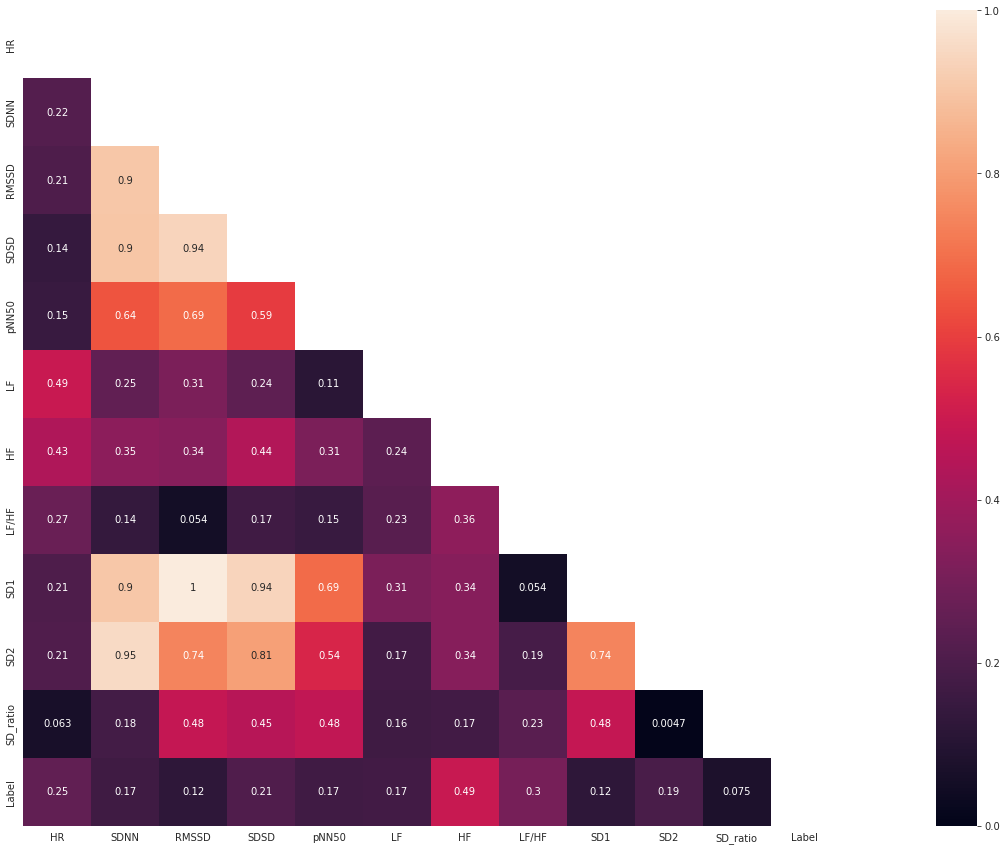

In [15]:
mask = np.zeros_like(data_copy.corr())
mask[np.triu_indices_from(mask)] = (
    True  # True = generate a mask of lower triangle of matrix
)
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(35, 15))
    sns.heatmap(data=corr_df, vmin=0, vmax=1, mask=mask, square=True, annot=True)

In [16]:
strong_relation_features = (
    pd.Series(corr_df["Label"]).nlargest(n=9).iloc[1:]
)  # nlargest(n=9)==> take 8 features
strong_relation_features

HF       0.489251
LF/HF    0.304231
HR       0.253775
SDSD     0.207381
SD2      0.193385
LF       0.172342
pNN50    0.170743
SDNN     0.166219
Name: Label, dtype: float64